In [1]:
import pandas as pd 
import os 
import sys 
import csv 
import numpy as np

In [2]:
df = pd.read_csv('g.csv')

In [3]:
df['Entry Date'] = pd.to_datetime(df['Entry Date'])

In [4]:
df['month'] = df['Entry Date'].dt.month

In [5]:
df['Profit%'] = df['Profit%'].astype('string')

In [6]:
df['Profit%'] = df['Profit%'].str.replace('%','')
df['Entry Price'] = df['Entry Price'].str.replace('$','')
df['Entry Price'] = df['Entry Price'].str.replace('*','')
df['Exit Price'] = df['Exit Price'].str.replace('$','')
df['Exit Price'] = df['Exit Price'].str.replace('*','')

/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88383/3921805541.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Entry Price'] = df['Entry Price'].str.replace('$','')
/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88383/3921805541.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Entry Price'] = df['Entry Price'].str.replace('*','')
/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88383/3921805541.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Exit Price'] = df['Exi

In [7]:
df['Profit%'] = df['Profit%'].astype('float')
df['Entry Price'] = df['Profit%'].astype('float')
df['Exit Price'] = df['Profit%'].astype('float')

# 1.0 Generating mean profit generated monthly 

# 2.0 Generating Viz from Performance 

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [9]:
df

,Unnamed: 0,\n,Crypto,Long/Short,Entry Date,Entry Price,Exit Price,Exit Date,Profit%,\n.1,month
0,43,\n,DOT/USD,Buy,2021-12-29,10.97,10.97,01/02/2022,10.97,\n,12
1,44,\n,LUNA/USD,Short,2021-12-25,15.50,15.50,12/29/2021,15.50,\n,12
2,39,\n,ADA/USD,Buy,2021-12-19,20.00,20.00,01/17/2022,20.00,\n,12
3,47,\n,SOL/USD,Buy,2021-12-13,17.42,17.42,12/15/2021,17.42,\n,12
4,48,\n,XTZ/USD,Buy,2021-12-13,15.25,15.25,12/14/2021,15.25,\n,12
5,51,\n,DOT/USD,Buy,2021-11-28,10.85,10.85,11/28/2021,10.85,\n,11
6,46,\n,ADA/USD,Buy,2021-11-24,5.36,5.36,12/27/2021,5.36,\n,11
7,42,\n,LINK/USD,Buy,2021-11-18,2.44,2.44,01/04/2022,2.44,\n,11
8,0,\n,SOL/USD,Buy,2022-06-29,14.30,14.30,07/07/2022,14.30,\n,6
9,9,\n,MATIC/USD,Buy,2022-04-30,13.66,13.66,05/04/2022,13.66,\n,4


In [11]:
df.groupby('month').mean('Profit%')

,Unnamed: 0,Entry Price,Exit Price,Profit%
month,,,,
1,34.400000,13.430000,13.430000,13.430000
2,27.500000,14.095000,14.095000,14.095000
3,19.750000,12.962500,12.962500,12.962500
4,11.500000,10.853333,10.853333,10.853333
5,6.000000,-3.358000,-3.358000,-3.358000
6,1.666667,18.103333,18.103333,18.103333
7,1.000000,26.670000,26.670000,26.670000
11,46.333333,6.216667,6.216667,6.216667
12,41.500000,13.951000,13.951000,13.951000


<AxesSubplot:title={'center':'Crypto Perfromance 2022'}, xlabel='Months', ylabel='Total Percent%'>

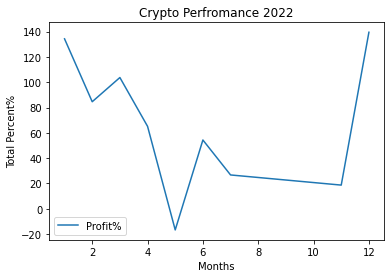

In [12]:
df.groupby(['month'])['Profit%'].sum().plot(legend=True,ylabel='Total Percent%', xlabel='Months', title='Crypto Perfromance 2022')
